In [5]:
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 10.1.3 퍼셉트론
- 가중치 값(z=w1x1+w2x2+...+wnxn=W.T.dot(X))을 계산한뒤 계단함수를 적용하여 결과를 출력

In [7]:
import numpy as numpy
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

In [9]:
y_pred

array([1])

그림 저장: perceptron_iris_plot


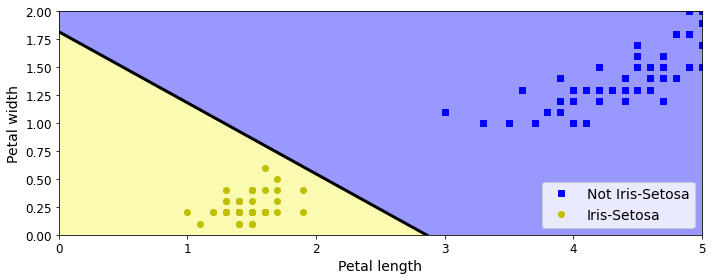

In [11]:

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

활성화 함수

In [13]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f,z,eps=0.000001):
    return (f(z+eps)-f(z-eps)) / (2 * eps)

그림 저장: activation_functions_plot


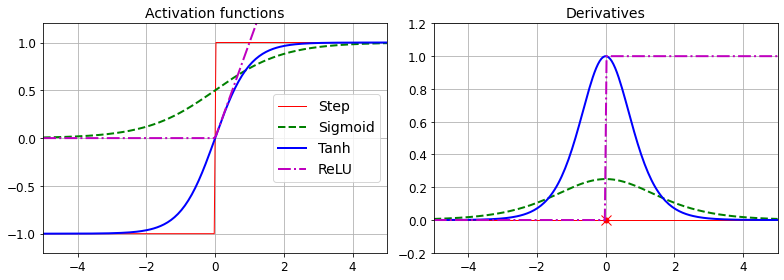

In [15]:

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

배타적 논리합(XOR)문제 해결

In [17]:
def heaviside(z):
    return (z>=0).astype(z.dtype)

def mlp_xor(x1,x2, activation=heaviside):
    return activation(-activation(x1+x2-1.5) + activation(x1+x2-0.5)-0.5)

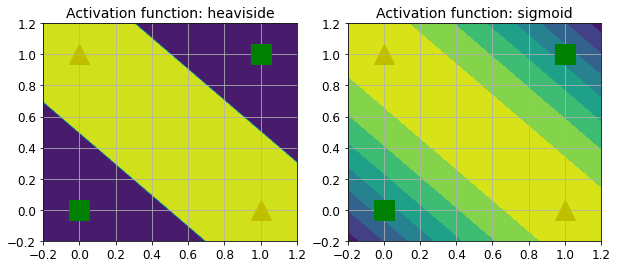

In [19]:

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# 10.2 케라스로 다층 퍼셉트론 구현하기 

In [21]:
tf.__version__

'2.3.0'

In [23]:
from tensorflow import keras
keras.__version__

'2.4.0'

## 10.2.2 Sequential API를 사용하여 이미지 분류기 만들기

In [25]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [27]:
X_train_full.shape

(60000, 28, 28)

validation set 생성

In [29]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:] 
X_test = X_test / 255.0

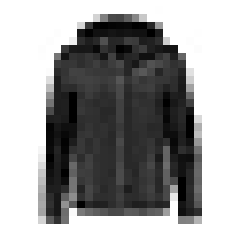

In [31]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [33]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [35]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [37]:
class_names[y_train[0]]

'Coat'

In [39]:
X_valid.shape

(5000, 28, 28)

In [41]:
X_test.shape

(10000, 28, 28)

그림 저장: fashion_mnist_plot


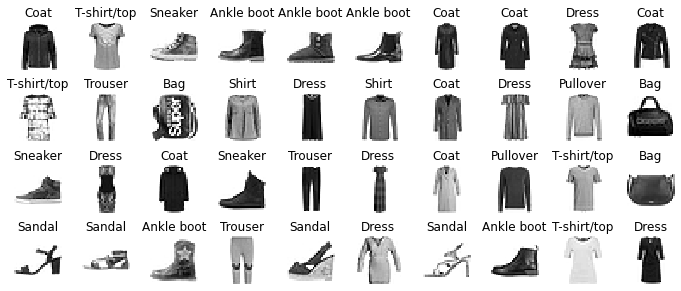

In [43]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### Sequential API로 모델생성

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
model.layers

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


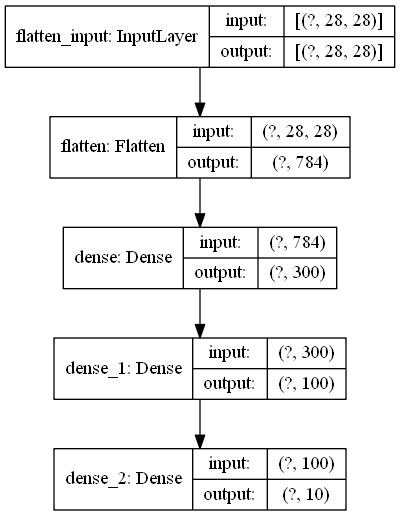

In [51]:
keras.utils.plot_model(model, "my_Fashion_mnist_model.png", show_shapes=True)

In [53]:
hidden1 = model.layers[1]
hidden1

In [55]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [57]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [59]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2206 - accuracy: 0.9203 - val_loss: 0.2890 - val_accuracy: 0.8966
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2174 - accuracy: 0.9216 - val_loss: 0.2922 - val_accuracy: 0.8956
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2137 - accuracy: 0.9232 - val_loss: 0.3754 - val_accuracy: 0.8632
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2101 - accuracy: 0.9250 - val_loss: 0.2932 - val_accuracy: 0.8962
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2086 - accuracy: 0.9243 - val_loss: 0.2820 - val_accuracy: 0.8980
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2031 - accuracy: 0.9272 - val_loss: 0.3012 - val_accuracy: 0.8914
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2008 - accuracy: 0.9291 - val_loss: 0.2918 - val_accuracy:

In [61]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

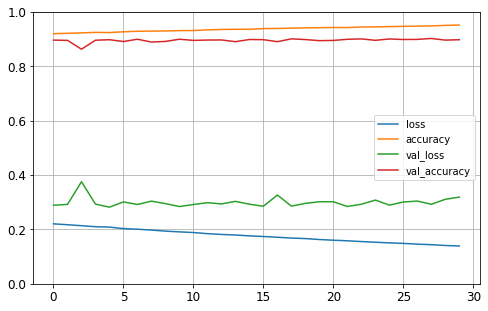

In [63]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

evaluate()를 사용하여 일반화 오차 추정

In [65]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 3.3314 - accuracy: 0.1000


[3.331393241882324, 0.10000000149011612]

In [67]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.11, 0.  , 0.09, 0.09, 0.  , 0.42, 0.08, 0.19, 0.01, 0.  ],
       [0.12, 0.  , 0.11, 0.09, 0.  , 0.39, 0.09, 0.19, 0.01, 0.  ],
       [0.12, 0.  , 0.09, 0.1 , 0.  , 0.39, 0.08, 0.19, 0.01, 0.  ]],
      dtype=float32)

In [69]:
y_pred = model.predict_classes(X_new)
y_pred

array([5, 5, 5], dtype=int64)

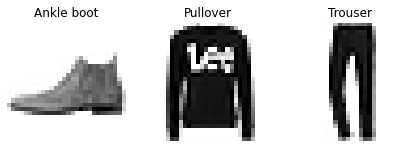

In [71]:
plt.figure(figsize=(7.2,2.4))
for index, image in enumerate(X_new):
    plt.subplot(1,3,index+1)
    plt.imshow(image,cmap="binary",interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 10.2.3 Sequential API를 사용해 회귀용 다층 퍼셉트론 만들기

In [73]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [75]:
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7670 - val_loss: 11.2071
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6124 - val_loss: 0.4569
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4449 - val_loss: 0.4050
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4096 - val_loss: 0.4149
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4024 - val_loss: 0.3886
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3925 - val_loss: 0.3905
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3964 - val_loss: 0.3910
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3868 - val_loss: 0.3968
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3796 - val_loss: 0.3809
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3777 - val_loss: 0.393

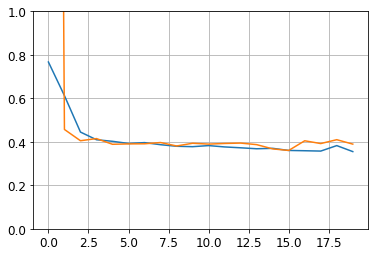

In [79]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [81]:
tf.test.is_gpu_available()

True

## 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [83]:
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=input_, outputs=[output])

In [87]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           930         dense_7[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_8[0][0]         

In [89]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
model = keras.Model(inputs=[input_A,input_B], outputs=[output])

In [91]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

histody = model.fit((X_train_A,X_train_B), y_train, epochs=20, validation_data=((X_valid_A,X_valid_B),y_valid))
mse_test = model.evaluate((X_test_A,X_test_B), y_test)

y_pred = model.predict((X_new_A,X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4175 - val_loss: 0.3984
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4160 - val_loss: 0.4207
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4139 - val_loss: 0.4066
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4119 - val_loss: 0.4100
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4107 - val_loss: 0.3963
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4087 - val_loss: 0.4115
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4077 - val_loss: 0.3969
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4063 - val_loss: 0.3884
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4048 - val_loss: 0.4128
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4037 - val_loss: 0.4030

규제를 위한 보조출력 추가

In [93]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

                    

In [95]:
model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4888 - main_output_loss: 0.4362 - aux_output_loss: 0.9620 - val_loss: 0.4602 - val_main_output_loss: 0.4060 - val_aux_output_loss: 0.9482
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4847 - main_output_loss: 0.4337 - aux_output_loss: 0.9434 - val_loss: 0.4540 - val_main_output_loss: 0.4014 - val_aux_output_loss: 0.9272
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4803 - main_output_loss: 0.4308 - aux_output_loss: 0.9255 - val_loss: 0.4489 - val_main_output_loss: 0.3980 - val_aux_output_loss: 0.9069
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4758 - main_output_loss: 0.4277 - aux_output_loss: 0.9088 - val_loss: 0.4479 - val_main_output_loss: 0.3987 - val_aux_output_loss: 0.8908
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4732 - main_output_loss: 0.4267 - aux_output_loss: 0.8926 - val_loss

In [97]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.4292 - main_output_loss: 0.3992 - aux_output_loss: 0.6997


In [99]:
total_loss

0.42923805117607117

## 10.2.5 서브클래싱 API로 동적 모델 만들기
- 반복문, 다양한 크기, 조건문을 포함한 모델을 만들고 싶다면 subclass API를 사용
- keras.Model을 상속받아서 만들기 떄문에 subclass

In [101]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self,inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30,activation="relu")


In [103]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6102 - output_1_loss: 0.5202 - output_2_loss: 1.4199 - val_loss: 0.6027 - val_output_1_loss: 0.4965 - val_output_2_loss: 1.5586
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5966 - output_1_loss: 0.5082 - output_2_loss: 1.3921 - val_loss: 0.5831 - val_output_1_loss: 0.4859 - val_output_2_loss: 1.4581
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5849 - output_1_loss: 0.4982 - output_2_loss: 1.3654 - val_loss: 0.5623 - val_output_1_loss: 0.4692 - val_output_2_loss: 1.3995
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5740 - output_1_loss: 0.4887 - output_2_loss: 1.3410 - val_loss: 0.5459 - val_output_1_loss: 0.4550 - val_output_2_loss: 1.3633
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5654 - output_1_loss: 0.4818 - output_2_loss: 1.3179 - val_loss: 0.5334 - val_output_1_loss: 0.4464 - val_ou

## 10.2.6 모델 저장과 복원
- Sequential API와 Function API는 모델저장하는 것이 매우 간단
- subclass API를 사용한다면 pickle 모듈을 사용해야함

In [105]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.2294 - val_loss: 1.1040
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.9288 - val_loss: 0.8594
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7746 - val_loss: 0.6903
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7026 - val_loss: 0.6457
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6540 - val_loss: 0.6276
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6132 - val_loss: 0.5565
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5792 - val_loss: 0.5316
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5499 - val_loss: 0.5727
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5231 - val_loss: 0.4770
Epoch 10/10
162/162 [==============================] - 0s 821us/step - loss: 0.4827


In [107]:
model.save("my_keras_model.h5")

In [109]:
model = keras.models.load_model("my_keras_model.h5")
model.predict(X_new)

array([[0.8188987],
       [1.2994146],
       [2.9437366]], dtype=float32)

In [111]:
model.save_weights("my_keras_weights.ckpt")

In [114]:
model.load_weights("my_keras_weights.ckpt")

## 10.2.7 콜백사용하기

In [115]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [116]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [120]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history = model.fit(X_train,y_train, epochs=10, callbacks=[checkpoint_cb], validation_data=(X_valid,y_valid))

model = keras.models.load_model("my_keras_model.h5")
mse_test = model.evaluate(X_test,y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3731 - val_loss: 0.3531
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3715 - val_loss: 0.3569
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3700 - val_loss: 0.3501
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3685 - val_loss: 0.3478
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3671 - val_loss: 0.3518
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3658 - val_loss: 0.3533
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3646 - val_loss: 0.3488
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3635 - val_loss: 0.3481
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3624 - val_loss: 0.3564
Epoch 10/10
162/162 [==============================] - 0s 827us/step - loss: 0.3668


In [121]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3670 - val_loss: 0.3582
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3658 - val_loss: 0.3645
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3646 - val_loss: 0.3558
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3635 - val_loss: 0.3475
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3623 - val_loss: 0.3492
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3612 - val_loss: 0.3526
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3602 - val_loss: 0.3462
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3592 - val_loss: 0.3436
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3582 - val_loss: 0.3548
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3571 - val_lo

In [122]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[val_train_ratio_cb])

Epoch 1/20
359/363 [============================>.] - ETA: 0s - loss: 0.3411
val/train: 1.06
363/363 [==============================] - 1s 1ms/step - loss: 0.3418 - val_loss: 0.3632
Epoch 2/20
320/363 [=========================>....] - ETA: 0s - loss: 0.3402
val/train: 1.03
363/363 [==============================] - 1s 1ms/step - loss: 0.3414 - val_loss: 0.3510
Epoch 3/20
362/363 [============================>.] - ETA: 0s - loss: 0.3408
val/train: 1.01
363/363 [==============================] - 1s 1ms/step - loss: 0.3409 - val_loss: 0.3440
Epoch 4/20
363/363 [==============================] - ETA: 0s - loss: 0.3407
val/train: 0.96
363/363 [==============================] - 1s 1ms/step - loss: 0.3407 - val_loss: 0.3258
Epoch 5/20
361/363 [============================>.] - ETA: 0s - loss: 0.3402
val/train: 0.99
363/363 [==============================] - 1s 1ms/step - loss: 0.3401 - val_loss: 0.3362
Epoch 6/20
363/363 [==============================] - ETA: 0s - loss: 0.3396
val/train: 0.

 ## 10.2.8 텐서보드

In [127]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [128]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_02_05-15_47_47'

In [129]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4474 - val_loss: 0.4379

In [131]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        data = (np.random.randn(100)+2) + step/100
        tf.summary.histogram("my_hist",data, buckets=50, step=step)
        images = np.random.rand(2,32,32,3)
        tf.summary.image("my_images", images * step/1000,step=step)
        texts = ["The step is "+str(step), "Its square is "+str(step**2)]
        tf.summary.text("my_text", texts,step=step)
        sine_wave = tf.math.sin(tf.range(12000)/ 48000 * 2 * np.pi*step)
        audio = tf.reshape(tf.cast(sine_wave,tf.float32), [1,-1,1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# 10.3 신경망 하이퍼 파라미터 튜팅

In [132]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [136]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [137]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [138]:
keras_reg.fit(X_train,y_train, epochs=100, validation_data=(X_valid, y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4060 - val_l

In [139]:
mse_test = keras_reg.score(X_test,y_test)
y_pred = keras_reg.predict(X_new)

162/162 [==============================] - 0s 815us/step - loss: 0.3346


In [140]:

np.random.seed(42)
tf.random.set_seed(42)

In [141]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Epoch 1/100
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
242/242 [==============================] - 0s 2ms/step - loss: 3.5557 - val_loss: 1.8752
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3347 - val_loss: 0.9522
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8591 - val_loss: 0.7820
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7360 - val_loss: 0.7249
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6930 - val_loss: 0.6994
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6668 - val_loss: 0.9118
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6514 - val_loss: 0.8495
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.638

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001A6DB357FA0>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test,y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaulate(X_test,y_test)